In [1]:
#load model and testing data
import pickle

with open('../../local_data/all_b_chosen_test_img_2.pickle', 'rb') as f:
    X_test, y_test = pickle.load(f)

In [13]:
from tensorflow import keras

model = keras.models.load_model('../../models/all_chosen_pre_model_11.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


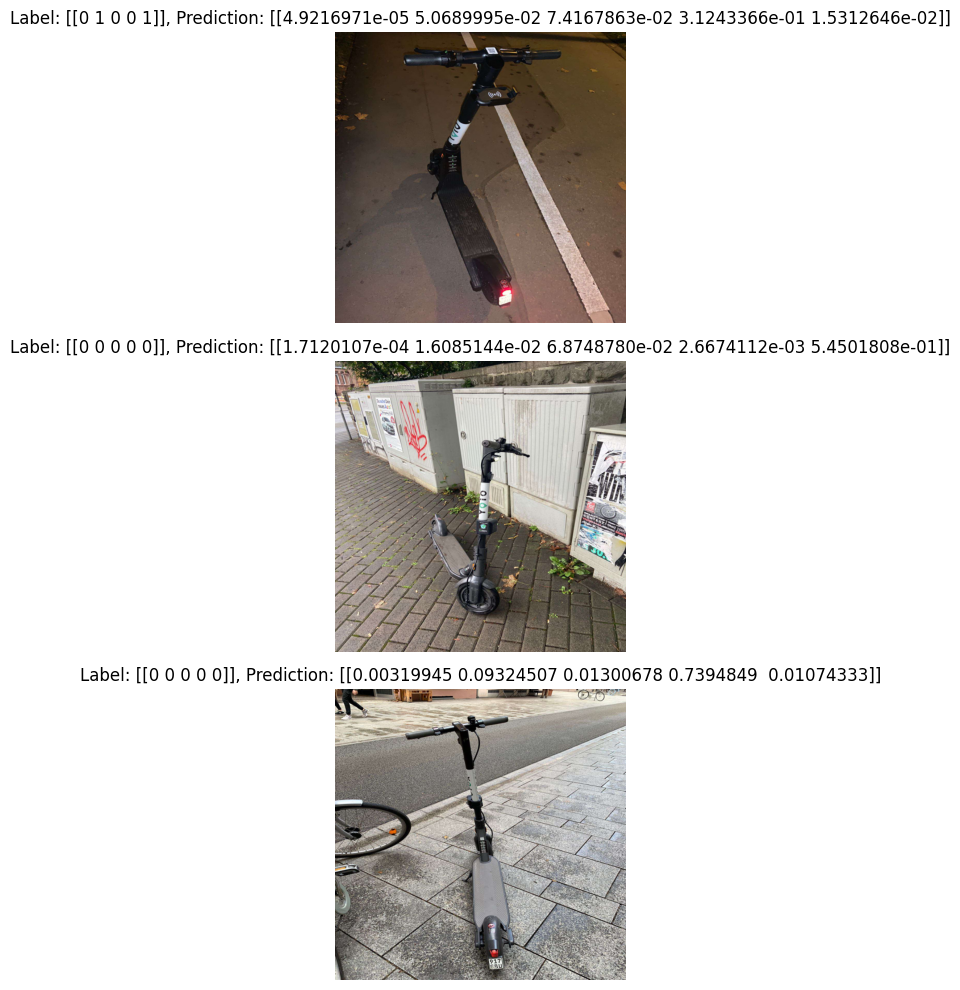

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure X_test, y_test, and predicted_classes are defined and accessible in this cell
X_test = X_test.astype('uint8')

fig, axes = plt.subplots(3, 1, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(X_test.shape[0])
    ax.imshow(X_test[idx])
    ax.set_title(f"Label: {y_test[idx:idx+1]}, Prediction: {(model.predict(X_test[idx:idx+1]))}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [15]:
y_pred = model.predict(X_test)


y_pred_bin = (y_pred > 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step


In [16]:
from sklearn.metrics import hamming_loss, accuracy_score, roc_auc_score, precision_recall_fscore_support
import numpy as np

# Convert y_test to multilabel-indicator format
y_test_multilabel = np.argmax(y_test, axis=1)

# Convert y_pred_bin to multilabel-indicator format
y_pred_bin_multilabel = np.argmax(y_pred_bin, axis=1)

# Calculate metrics using the converted arrays
h_loss = hamming_loss(y_test_multilabel, y_pred_bin_multilabel)
accuracy = accuracy_score(y_test_multilabel, y_pred_bin_multilabel)
precision, recall, f1, _ = precision_recall_fscore_support(y_test_multilabel, y_pred_bin_multilabel, average=None)


In [17]:
print(f"Hamming Loss: {h_loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Hamming Loss: 0.29842931937172773
Accuracy: 0.7015706806282722
Precision: [0.75630252 0.68421053 0.57142857 0.59459459 0.5       ]
Recall: [0.86538462 0.44827586 0.72727273 0.62857143 0.08333333]
F1 Score: [0.80717489 0.54166667 0.64       0.61111111 0.14285714]
